In [2]:
# importing libraries
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [3]:
# loadind the data
train = pd.read_csv(r'C:\Users\saipr\OneDrive\Desktop\IT final project\train.csv')
test = pd.read_csv(r'C:\Users\saipr\OneDrive\Desktop\IT final project\test.csv')

In [5]:
# shape of training and testing data
train.shape, test.shape

((12980, 12), (4399, 11))

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [8]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [10]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [11]:
# looking for missing values in the datasaet
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

C:\Users\saipr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

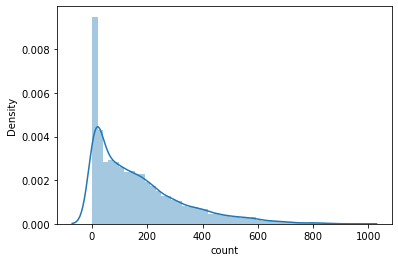

In [13]:
# univariate analysis
sn.distplot(train["count"])

C:\Users\saipr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

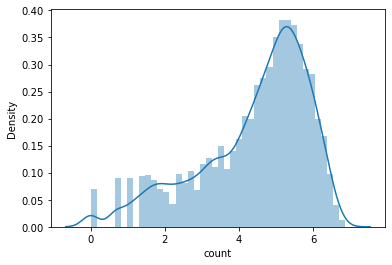

In [14]:
sn.distplot(np.log(train["count"]))

[Text(0.5, 1.0, 'count of bikes duing workingday')]

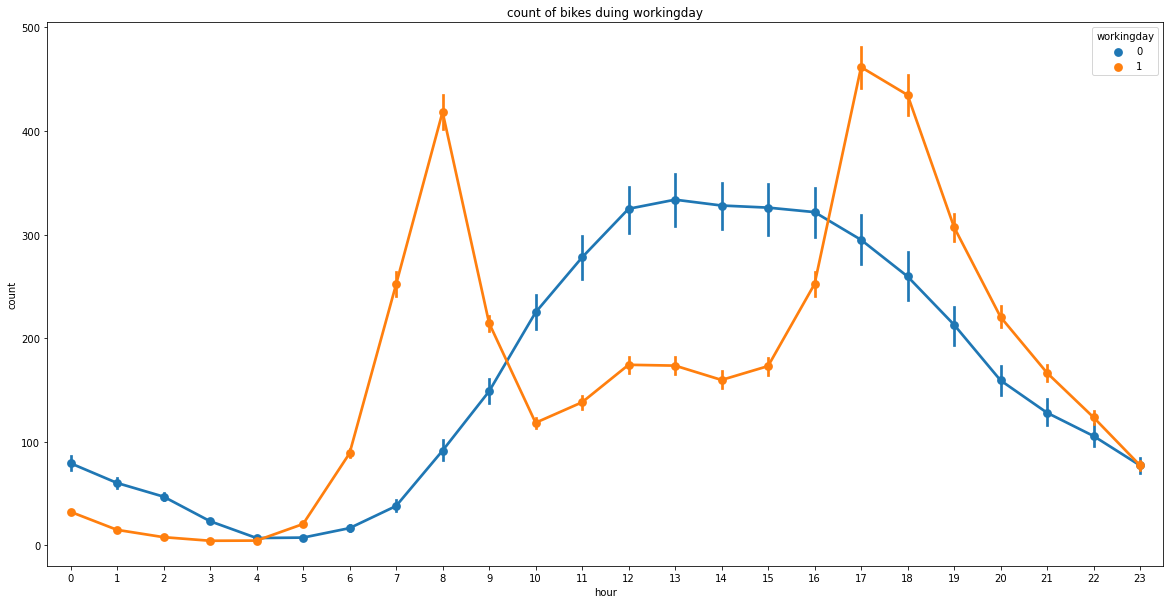

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=train, x='hour',y='count',hue='workingday',ax=ax)
ax.set(title='count of bikes duing workingday')

C:\Users\saipr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='registered', ylabel='Density'>

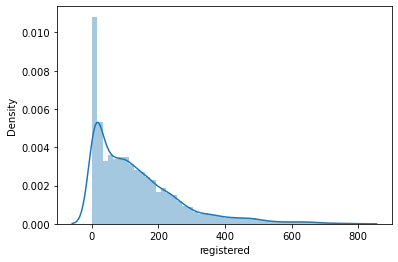

In [19]:
sn.distplot(train["registered"])

<AxesSubplot:>

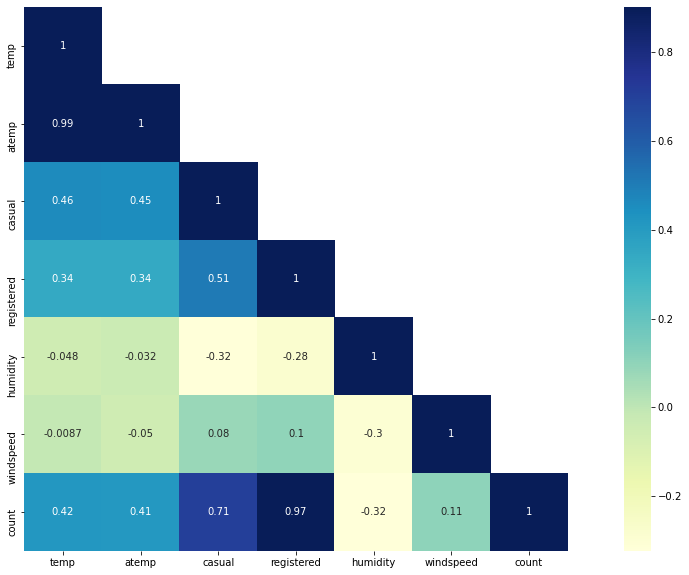

In [20]:
# bivariate analysis
# looking at the correlation between numerical variables
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [16]:
# extracting date, hour and month from the datetime
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [17]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [23]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

In [24]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

In [44]:
training.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,month
0,1,0,0,1,9.84,81.0,0.0,3,13,16,0,1
1,1,0,0,1,9.02,80.0,0.0,8,32,40,1,1
2,1,0,0,1,9.02,80.0,0.0,5,27,32,2,1
3,1,0,0,1,9.84,75.0,0.0,3,10,13,3,1
4,1,0,0,1,9.84,75.0,0.0,0,1,1,4,1


In [26]:
validation.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,month
10774,2,0,1,1,15.58,50.0,19.0012,6,21,27,1,3
10775,2,0,1,1,14.76,53.0,19.9995,1,6,7,2,3
10776,2,0,1,1,13.94,61.0,8.9981,0,7,7,3,3
10777,2,0,1,1,13.94,53.0,6.0032,1,1,2,4,3
10778,2,0,1,1,13.12,61.0,6.0032,0,26,26,5,3


In [27]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression

In [28]:
# initialize the linear regression model
lModel = LinearRegression()

In [29]:
X_train = training.drop('count', 1)
y_train = np.log(training['count'])
X_val = validation.drop('count', 1)
y_val = np.log(validation['count'])

In [30]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((10774, 11), (10774,), (2206, 11), (2206,))

In [31]:
lModel.fit(X_train,y_train)
prediction = lModel.predict(X_val)

In [32]:
# defining a function which will return the rmsle score
def rmsle(y, y_):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [33]:
rmsle(y_val,prediction)

0.8875379204281798

In [34]:
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor

In [36]:
dt_reg = DecisionTreeRegressor(max_depth=5)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [37]:
predict = dt_reg.predict(X_val)

In [38]:
rmsle(y_val, predict)

0.17102267399446916

In [41]:
submission = pd.DataFrame()

In [42]:
# creating a count column and saving the predictions in it
submission['count'] = final_prediction

In [43]:
submission.to_csv('submission.csv', header=True, index=False)